<a href="https://colab.research.google.com/github/PCeltide/Python-for-Algorithmic-Trading-Cookbook/blob/main/Chapter%205/4_Market_Inefficiency_Based_on_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's load the data again

!pip install openbb[all]

In [ ]:
from openbb import obb

Extensions to add: alpha_vantage@1.4.1, biztoc@1.4.2, cboe@1.4.1, deribit@1.0.1, ecb@1.4.2, econometrics@1.5.3, federal_reserve@1.4.3, finra@1.4.1, finviz@1.3.1, government_us@1.4.1, multpl@1.1.1, nasdaq@1.4.1, openbb_charting@2.3.4, quantitative@1.4.3, seeking_alpha@1.4.1, stockgrid@1.4.1, technical@1.4.3, tmx@1.3.2, tradier@1.3.1, wsj@1.4.1, yfinance@1.4.6
Extensions to remove: federal_reserve@1.4.2, yfinance@1.4.3

Building...


In [ ]:
obb.user.preferences.output_type = "dataframe"
obb.user.credentials.fmp_api_key = "YOUR_API_KEY"

In [ ]:
nasdaq_100_tickers = [
    'AAPL',  # Apple Inc.
    'MSFT',  # Microsoft Corp.
    'AMZN',  # Amazon.com Inc.
    'NVDA',  # NVIDIA Corp.
    'GOOGL', # Alphabet Inc. Class A
    'TSLA',  # Tesla Inc
    'META',  # Meta Platforms Inc.
    'AVGO',  # Broadcom Inc.
    'PEP',   # PepsiCo Inc.
    'COST',  # Costco Wholesale Corp.
    'ADBE',  # Adobe Inc.
    'CSCO',  # Cisco Systems Inc.
    'NFLX',  # Netflix Inc.
    'TMUS',  # T-Mobile US Inc.
    'AMD',   # Advanced Micro Devices Inc.
    'INTC',  # Intel Corp.
    'CMCSA', # Comcast Corp.
    'TXN',   # Texas Instruments Inc.
    'AMGN',  # Amgen Inc.
    'HON',   # Honeywell International Inc.
    'INTU',  # Intuit Inc.
    'QCOM',  # QUALCOMM Inc.
    'SBUX',  # Starbucks Corp.
    'ISRG',  # Intuitive Surgical Inc.
    'BKNG',  # Booking Holdings Inc.
    'GILD',  # Gilead Sciences Inc.
    'ADP',   # Automatic Data Processing Inc.
    'MDLZ',  # Mondelez International Inc.
    'AMAT',  # Applied Materials Inc.
    'ADI',   # Analog Devices Inc.
    'REGN',  # Regeneron Pharmaceuticals Inc.
    'LRCX',  # Lam Research Corp.
    'VRTX',  # Vertex Pharmaceuticals Inc.
    'PYPL',  # PayPal Holdings Inc.
    'MU',    # Micron Technology Inc.
    'CSX',   # CSX Corp.
    'PANW',  # Palo Alto Networks Inc.
    'MAR',   # Marriott International Inc.
    'SNPS',  # Synopsys Inc.
    'ASML',  # ASML Holding NV ADR
    'MELI',  # MercadoLibre Inc.
    'CHTR',  # Charter Communications Inc.
    'CDNS',  # Cadence Design Systems Inc.
    'KLAC',  # KLA Corp.
    'EXC',   # Exelon Corp.
    'AEP',   # American Electric Power Co Inc.
    'PAYX',  # Paychex Inc.
    'SIRI',  # Sirius XM Holdings Inc. (Note: Sometimes in/out, verify against your image)
    'ORLY',  # O'Reilly Automotive Inc.
    'CTAS',  # Cintas Corp.
    'DXCM',  # DexCom Inc.
    'MRVL',  # Marvell Technology Inc.
    'LULU',  # Lululemon Athletica Inc.
    'FTNT',  # Fortinet Inc.
    'KDP',   # Keurig Dr Pepper Inc.
    'MNST',  # Monster Beverage Corp.
    'PCAR',  # PACCAR Inc.
    'CRWD',  # CrowdStrike Holdings Inc
    'ADSK',  # Autodesk Inc.
    'KHC',   # Kraft Heinz Co.
    'CEG',   # Constellation Energy Corp
    'ODFL',  # Old Dominion Freight Line Inc.
    'IDXX',  # IDEXX Laboratories Inc.
    'BIIB',  # Biogen Inc.
    'ROP',   # Roper Technologies Inc.
    'FAST',  # Fastenal Co.
    'MCHP',  # Microchip Technology Inc.
    'WDAY',  # Workday Inc. Class A
    'XEL',   # Xcel Energy Inc.
    'EA',    # Electronic Arts Inc.
    'VRSK',  # Verisk Analytics Inc.
    'CSGP',  # CoStar Group Inc.
    'CPRT',  # Copart Inc.
    'BKR',   # Baker Hughes Co.
    'CTSH',  # Cognizant Technology Solutions Corp. Class A
    'DLTR',  # Dollar Tree Inc.
    'TTD',   # Trade Desk Inc. Class A
    'ANSS',  # ANSYS Inc.
    'CDW',   # CDW Corp.
    'AZN',   # AstraZeneca PLC ADR
    'VRSN',  # VeriSign Inc.
    'NXPI',  # NXP Semiconductors NV
    'ON',    # ON Semiconductor Corp.
    'TEAM',  # Atlassian Corp. Class A
    #'WBA',   # Walgreens Boots Alliance Inc
    'SGEN',  # Seagen Inc. (Note: Acquisition by PFE might affect its listing status)
    'ILMN',  # Illumina Inc.
    'EXPD',  # Expeditors International of Washington Inc.
    'ALGN',  # Align Technology Inc.
    #'EBAY',  # eBay Inc.
    'ZM',    # Zoom Video Communications Inc. Class A
    'DDOG',  # Datadog Inc Cl A
    'MRNA',  # Moderna Inc
    'PDD',   # PDD Holdings Inc ADR
    'SIRI',  # Sirius XM Holdings Inc (Appears again, often only one listing class is primary)
    'ABNB',  # Airbnb Inc. Class A
    'FANG',  # Diamondback Energy Inc
    'GFS',   # Globalfoundries Inc
    #'WBD',   # Warner Bros.Discovery Inc
    'ZS',    # Zscaler Inc
    'TTWO',  # Take-Two Interactive Software Inc.
    'GEHC',  # GE HealthCare Technologies Inc
    'SPLK',  # Splunk Inc (Note: Acquisition by CSCO might affect its listing status)
    'DASH'   # DoorDash Inc A
]


stocks = sorted(list(set(nasdaq_100_tickers)))
print(len(stocks))

100


In [ ]:
#stocks = sorted(['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'NVDA', 'TSLA', 'JPM', 'V', 'JNJ', 'GS', 'LLY', 'XOM', 'WMT', 'PG', 'HD', 'UNH', 'BAC', 'KO', 'CVX'])
start_date = "2018-01-01"
end_date = "2025-05-01"
historical_price_df = obb.equity.price.historical(symbol = stocks,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                  provider="fmp")

In [ ]:
any_nan_exists = historical_price_df.isnull().values.any()
print(f"Are there any NaN values in the DataFrame? {any_nan_exists}")

Are there any NaN values in the DataFrame? False


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
historical_price_df.index = pd.to_datetime(historical_price_df.index)
historical_price_multi_index_df = historical_price_df.set_index('symbol', append=True)
historical_price_multi_index_df_sorted = historical_price_multi_index_df.sort_index(level=['symbol', 'date'])
#historical_price_multi_index_df.info()

In [ ]:
historical_price_multi_index_df_sorted.head()

,,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent
date,symbol,,,,,,,,,,
2018-01-02,AAPL,42.54,43.08,42.32,43.07,102223736,42.7525,40.43,102223736.0,0.5250,0.012500
2018-01-03,AAPL,43.13,43.64,42.99,43.06,118071600,43.2050,40.42,118071600.0,-0.0750,-0.001623
2018-01-04,AAPL,43.14,43.37,43.02,43.26,89738400,43.1975,40.61,89738400.0,0.1225,0.002782
2018-01-05,AAPL,43.36,43.84,43.26,43.75,94640072,43.5525,41.07,94640072.0,0.3900,0.008995
2018-01-08,AAPL,43.59,43.90,43.48,43.59,82271200,43.6400,40.92,82271200.0,0.0000,0.000000


One well-documented anomaly is the low-volatility anomaly. Traditional finance theory suggests a positive relationship between risk and return – higher risk should mean higher expected return. However, empirically, portfolios of low-volatility stocks have often outperformed high-volatility stocks on a risk-adjusted basis over the long term. This paradox suggests an inefficiency that traders might exploit.

To quantify volatility and use it as a factor, we need robust estimators. While simple standard deviation of returns is common, other estimators can capture different facets of price movements. The book (and your notebook) introduces the Parkinson Estimator (also known as Parkinson's Number).

# The Parkinson Estimator

The Parkinson Estimator is a way to estimate the volatility of an asset using its high and low prices over a specific period.  The intuition is that the daily high-low range can provide more information about volatility than closing prices alone, especially if a stock makes significant intraday moves but closes near its opening price.

The formula for the daily Parkinson's number is:
$$P_t = \frac{1}{4\ln(2)}\left(\ln\left(\frac{\textrm{High}_t}{\textrm{Low}_t}\right)\right)^2$$

In [ ]:
from scipy.stats import zscore

In [ ]:
def calculate_parkinson_volatility(daily_price_df, window = 14, trading_days = 252):
  '''This fucntion takes in the dataframe for a given symbols of the daily
      high and low values of the stock in our time period and returns the
      (parkinson) volatility z-score '''
  const = (4*np.log(2))**(-1) # The constant
  park_num_df = pd.DataFrame()
  park_num_df.index = daily_price_df.index

  # Use the formual above
  park_num_df['P_t'] = const * (np.log(daily_price_df['high']/daily_price_df['low']))**2

  # Take the rolling mean over "2-3 weeks"
  rolling_mean = park_num_df['P_t'].rolling(window=window).mean().dropna()

  # Normalize the values annually
  ann_roll_mean = np.sqrt(rolling_mean * trading_days)

  # Find the z-scores, that is, the amount of std the value is away from the mean
  z_score = pd.Series(zscore(ann_roll_mean), index=ann_roll_mean.index)
  return z_score.reindex(daily_price_df.index)

In [ ]:
historical_vol = historical_price_multi_index_df_sorted.groupby('symbol', group_keys=False).apply(calculate_parkinson_volatility)
new_column_name = 'parkinson_vol_zscore'
historical_price_multi_index_df_sorted[new_column_name] = historical_vol
historical_price_multi_index_df_sorted.tail()

,,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent,parkinson_vol_zscore
date,symbol,,,,,,,,,,,
2025-04-25,ZS,209.90,217.15,209.38,215.58,2885268,213.0025,215.58,2885268.0,5.68,0.027100,0.969414
2025-04-28,ZS,219.34,221.50,216.43,219.86,2910838,219.2825,219.86,2910838.0,0.52,0.002371,0.396993
2025-04-29,ZS,220.74,224.70,219.88,223.85,2386600,222.2925,223.85,2386600.0,3.11,0.014100,0.138179
2025-04-30,ZS,218.92,226.60,217.76,226.17,2247000,222.3625,226.17,2247000.0,7.25,0.033100,-0.778512
2025-05-01,ZS,228.50,230.79,226.54,227.06,3165041,228.2225,227.06,3165041.0,-1.44,-0.006302,-0.917413


In [ ]:
# Let's now create a table of forward values

lags = [1, 5, 10, 21, 42, 63]

for t in lags:
  target = historical_price_multi_index_df_sorted.groupby('symbol', group_keys=False)['close'].pct_change(periods=t).shift(-t)
  historical_price_multi_index_df_sorted[f'target_{t}d'] = target

historical_price_multi_index_df_sorted.tail(10)

,,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent,parkinson_vol_zscore,target_1d,target_5d,target_10d,target_21d,target_42d,target_63d
date,symbol,,,,,,,,,,,,,,,,,
2025-04-17,ZS,202.87,203.00,199.10,201.09,1785451,201.5150,201.09,1785451.0,-1.78,-0.008774,1.323424,-0.036750,0.072057,NaN,NaN,NaN,NaN
2025-04-21,ZS,198.88,199.29,191.46,193.70,1581700,195.8325,193.70,1581700.0,-5.18,-0.026000,1.267154,0.014559,0.135054,NaN,NaN,NaN,NaN
2025-04-22,ZS,196.95,198.69,194.35,196.52,1445727,196.6275,196.52,1445727.0,-0.43,-0.002183,1.253100,0.020710,0.139070,NaN,NaN,NaN,NaN
2025-04-23,ZS,202.00,207.23,199.53,200.59,2186033,202.3375,200.59,2186033.0,-1.41,-0.006980,1.216116,0.047610,0.127524,NaN,NaN,NaN,NaN
2025-04-24,ZS,202.24,212.36,201.70,210.14,2642900,206.6100,210.14,2642900.0,7.90,0.039100,1.125439,0.025888,0.080518,NaN,NaN,NaN,NaN
2025-04-25,ZS,209.90,217.15,209.38,215.58,2885268,213.0025,215.58,2885268.0,5.68,0.027100,0.969414,0.019853,NaN,NaN,NaN,NaN,NaN
2025-04-28,ZS,219.34,221.50,216.43,219.86,2910838,219.2825,219.86,2910838.0,0.52,0.002371,0.396993,0.018148,NaN,NaN,NaN,NaN,NaN
2025-04-29,ZS,220.74,224.70,219.88,223.85,2386600,222.2925,223.85,2386600.0,3.11,0.014100,0.138179,0.010364,NaN,NaN,NaN,NaN,NaN
2025-04-30,ZS,218.92,226.60,217.76,226.17,2247000,222.3625,226.17,2247000.0,7.25,0.033100,-0.778512,0.003935,NaN,NaN,NaN,NaN,NaN


We need a way to measure if there's a meaningful relationship between them. Specifically, we want to know if the rank of a stock by our factor value is correlated with the rank of its future returns. For this, the **Spearman Rank Correlation** is a common and appropriate tool.

The Spearman rank correlation coefficient assesses the strength and direction of a monotonic relationship between two ranked variables. A monotonic relationship is one where as one variable increases, the other variable tends to consistently increase or consistently decrease, but not necessarily at a constant rate (which is what Pearson correlation measures for linear relationships).

Note, the Spearman rank correlation between a factor's values and subsequent forward returns is often referred to as the **Information Coefficient** (IC).

In [ ]:
from scipy.stats import spearmanr
import seaborn as sns

In [ ]:
dynamic_var_collection = {} # Just to help naming

for t in lags:
    dynamic_var_collection[f"vol_target_{t}_df"] = historical_price_multi_index_df_sorted[['parkinson_vol_zscore',	f'target_{t}d']].dropna()
    dynamic_var_collection[f"correlation_{t}"], dynamic_var_collection[f"p_value_{t}"] = spearmanr(
                                                                                                    dynamic_var_collection[f"vol_target_{t}_df"]['parkinson_vol_zscore'],
                                                                                                    dynamic_var_collection[f"vol_target_{t}_df"][f'target_{t}d']
                                                                                                    )

For t = 1, The Correlation Coefficient is 0.011703132561055703 and the p-Value is 9.09800216206519e-07


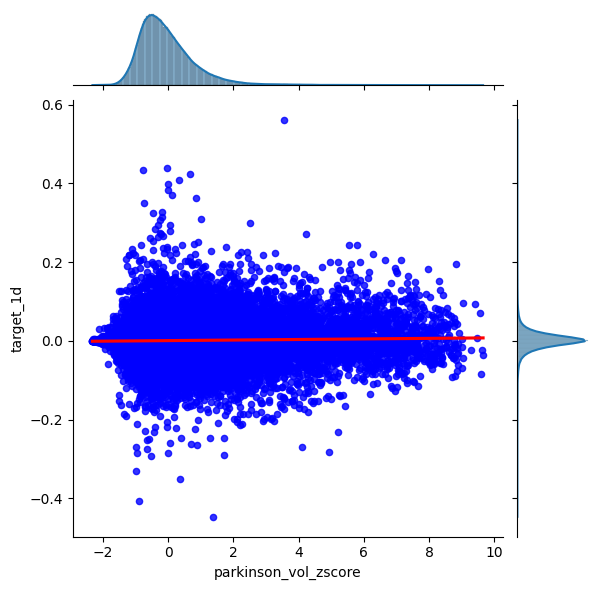

In [ ]:
t = lags[0]
sns.jointplot(x='parkinson_vol_zscore',
              y=f'target_{t}d',
              data=dynamic_var_collection[f"vol_target_{t}_df"],
              kind='reg',
              joint_kws={
                          'line_kws': {'color': 'red'},  # Change regression line color to red
                          'scatter_kws': {'color': 'blue', 's': 20} # Optional: Change scatter plot color and size)
                        }
              )
print(f"For t = {t}, The Correlation Coefficient is {dynamic_var_collection[f'correlation_{t}']} and the p-Value is {dynamic_var_collection[f'p_value_{t}']}")

For t = 5, The Correlation Coefficient is 0.03278308628990918 and the p-Value is 5.674651881476041e-43


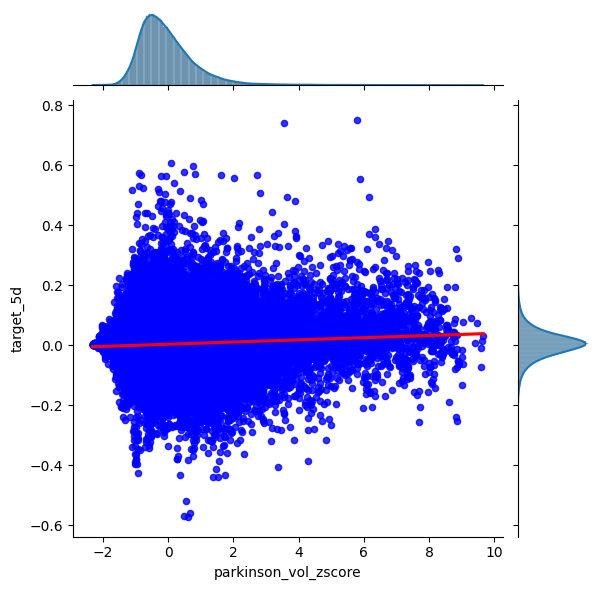

In [ ]:
t = lags[1]
sns.jointplot(x='parkinson_vol_zscore',
              y=f'target_{t}d',
              data=dynamic_var_collection[f"vol_target_{t}_df"],
              kind='reg',
              joint_kws={
                          'line_kws': {'color': 'red'},  # Change regression line color to red
                          'scatter_kws': {'color': 'blue', 's': 20} # Optional: Change scatter plot color and size)
                        }
              )
print(f"For t = {t}, The Correlation Coefficient is {dynamic_var_collection[f'correlation_{t}']} and the p-Value is {dynamic_var_collection[f'p_value_{t}']}")

For t = 10, The Correlation Coefficient is 0.04256647460072657 and the p-Value is 4.848157590056677e-71


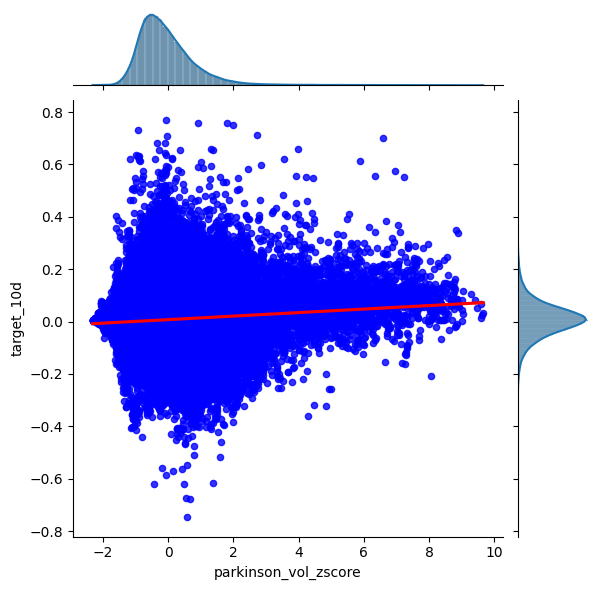

In [ ]:
t = lags[2]
sns.jointplot(x='parkinson_vol_zscore',
              y=f'target_{t}d',
              data=dynamic_var_collection[f"vol_target_{t}_df"],
              kind='reg',
              joint_kws={
                          'line_kws': {'color': 'red'},  # Change regression line color to red
                          'scatter_kws': {'color': 'blue', 's': 20} # Optional: Change scatter plot color and size)
                        }
              )
print(f"For t = {t}, The Correlation Coefficient is {dynamic_var_collection[f'correlation_{t}']} and the p-Value is {dynamic_var_collection[f'p_value_{t}']}")

For t = 21, The Correlation Coefficient is 0.04508473757188317 and the p-Value is 5.473404405994152e-79


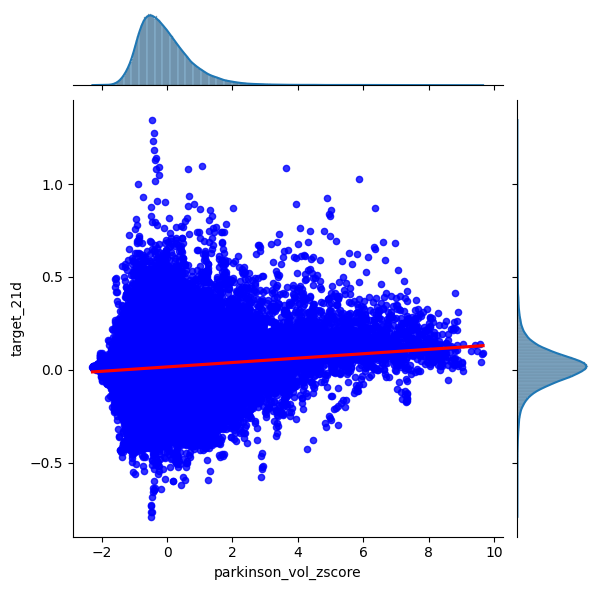

In [ ]:
t = lags[3]
sns.jointplot(x='parkinson_vol_zscore',
              y=f'target_{t}d',
              data=dynamic_var_collection[f"vol_target_{t}_df"],
              kind='reg',
              joint_kws={
                          'line_kws': {'color': 'red'},  # Change regression line color to red
                          'scatter_kws': {'color': 'blue', 's': 20} # Optional: Change scatter plot color and size)
                        }
              )
print(f"For t = {t}, The Correlation Coefficient is {dynamic_var_collection[f'correlation_{t}']} and the p-Value is {dynamic_var_collection[f'p_value_{t}']}")

For t = 42, The Correlation Coefficient is 0.05834166936582466 and the p-Value is 1.7009008767932316e-129


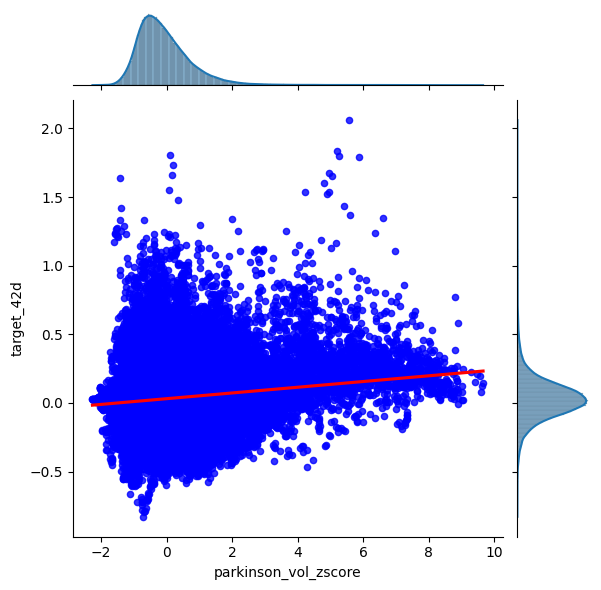

In [ ]:
t = lags[4]
sns.jointplot(x='parkinson_vol_zscore',
              y=f'target_{t}d',
              data=dynamic_var_collection[f"vol_target_{t}_df"],
              kind='reg',
              joint_kws={
                          'line_kws': {'color': 'red'},  # Change regression line color to red
                          'scatter_kws': {'color': 'blue', 's': 20} # Optional: Change scatter plot color and size)
                        }
              )
print(f"For t = {t}, The Correlation Coefficient is {dynamic_var_collection[f'correlation_{t}']} and the p-Value is {dynamic_var_collection[f'p_value_{t}']}")

For t = 63, The Correlation Coefficient is 0.08512745130212726 and the p-Value is 1.4194605860171733e-270


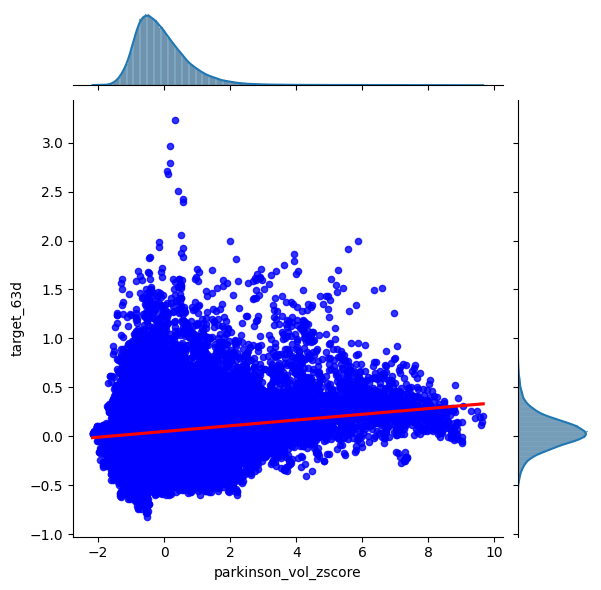

In [ ]:
t = lags[5]
sns.jointplot(x='parkinson_vol_zscore',
              y=f'target_{t}d',
              data=dynamic_var_collection[f"vol_target_{t}_df"],
              kind='reg',
              joint_kws={
                          'line_kws': {'color': 'red'},  # Change regression line color to red
                          'scatter_kws': {'color': 'blue', 's': 20} # Optional: Change scatter plot color and size)
                        }
              )
print(f"For t = {t}, The Correlation Coefficient is {dynamic_var_collection[f'correlation_{t}']} and the p-Value is {dynamic_var_collection[f'p_value_{t}']}")

In [ ]:
print("Summary:")
for t in lags:
  print(f"For t = {t}, The Correlation Coefficient is {dynamic_var_collection[f'correlation_{t}']} and the p-Value is {dynamic_var_collection[f'p_value_{t}']}")

Summary:
For t = 1, The Correlation Coefficient is 0.011703132561055703 and the p-Value is 9.09800216206519e-07
For t = 5, The Correlation Coefficient is 0.03278308628990918 and the p-Value is 5.674651881476041e-43
For t = 10, The Correlation Coefficient is 0.04256647460072657 and the p-Value is 4.848157590056677e-71
For t = 21, The Correlation Coefficient is 0.04508473757188317 and the p-Value is 5.473404405994152e-79
For t = 42, The Correlation Coefficient is 0.05834166936582466 and the p-Value is 1.7009008767932316e-129
For t = 63, The Correlation Coefficient is 0.08512745130212726 and the p-Value is 1.4194605860171733e-270


So we can conclude:
stocks with higher relative Parkinson volatility (a higher z-score compared to their own historical Parkinson volatility) have shown a slight tendency to have higher 63-day forward returns in our dataset.

This is against the "low volatility anomaly", which typically suggests that stocks with lower absolute or historical volatility tend to outperform!  It might suggest that changes or deviations in a stock's typical volatility (as captured by Parkinson) could have some signaling power.

# Factor Quantile Analysis

To understand the practical implications for portfolio construction, we turn to factor quintile analysis:

1. At each point in time (e.g., daily or monthly), sorting all stocks in your universe based on their factor values (your parkinson_vol_zscore).

2. Dividing these sorted stocks into a number of equal-sized portfolios (e.g., 5 quintiles). Quintile 1 would contain stocks with the lowest factor values, and Quintile 5 would contain stocks with the highest factor values.

3. Calculating the subsequent average forward returns for each of these quintile portfolios.

4. Observing if there's a clear monotonic trend in returns across the quintiles (e.g., does Quintile 5 consistently outperform Quintile 1?).

5. Often, one also looks at the performance of a long-short portfolio (e.g., long Quintile 5, short Quintile 1).

This approach helps to:

* See if the factor can differentiate between future top and bottom performers more clearly.
* Assess the magnitude of return differences between the extreme quintiles.
* Understand if the relationship is truly monotonic across the factor spectrum.

In [ ]:
data_set_quantile = dynamic_var_collection["vol_target_63_df"]
quantile_assignment = data_set_quantile.groupby('date')['parkinson_vol_zscore'].transform(
    lambda x: pd.qcut(x, q=20, labels=range(1, 21), duplicates='drop')
                                                                                         )
data_set_quantile['vol_factor_quantile'] = quantile_assignment

In [ ]:
data_set_quantile.head()

,,parkinson_vol_zscore,target_63d,vol_factor_quantile
date,symbol,,,
2018-01-22,AAPL,-1.122979,-0.066441,3
2018-01-23,AAPL,-1.153711,-0.079530,3
2018-01-24,AAPL,-1.058966,-0.060836,4
2018-01-25,AAPL,-0.901125,-0.040206,6
2018-01-26,AAPL,-0.914127,-0.053638,6


In [ ]:
quantiles = pd.DataFrame()
quantiles['mean_target_63d'] = data_set_quantile.groupby(['vol_factor_quantile']).target_63d.agg(['mean'])

In [ ]:
quantiles.head(20)

,mean_target_63d
vol_factor_quantile,
1,0.069608
2,0.063554
3,0.063826
4,0.053899
5,0.051789
6,0.051782
7,0.050164
8,0.047234
9,0.044368


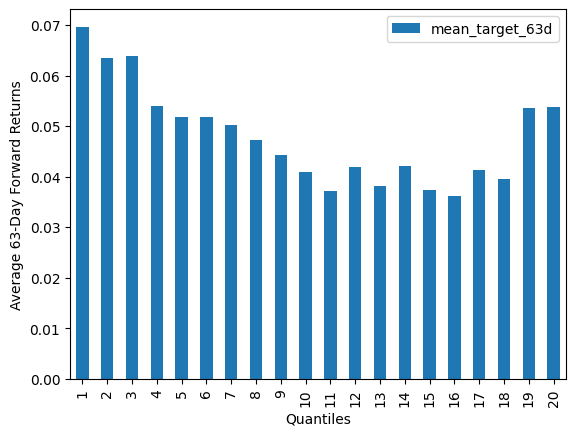

In [ ]:
quantiles.plot(kind='bar')
plt.xlabel('Quantiles')
plt.ylabel('Average 63-Day Forward Returns')
plt.show()

The mean returns are not monotonic as we can see, but rather exhibit a "U" shape. What we do see is that the lower volatility quantilies give a higher 63-day foward return, but there is a resurgance after the middle quantiles in the returns. A reasonable strategy might be to long the lowest 10% and highest 10% quantiles!